# Introduction and First Problem

A common problem is something like the following:

We are given a collection of $n$ data points which are represented as elements of $d$-dimensional space: $$\mathbf{x}_1,\mathbf{x}_2,\dotsm, \mathbf{x}_n\in \mathbb{R}^d.$$ 

We are tasked with finding $k$ ***clusters*** that meaningfully segment the data into $k$ many subcollections.

For example, we could have $ n = 1,000$ synthetic (i.e. randomly generated) data points living in $\mathbb{R}^2$ ($d=2$) that are distributed something like:

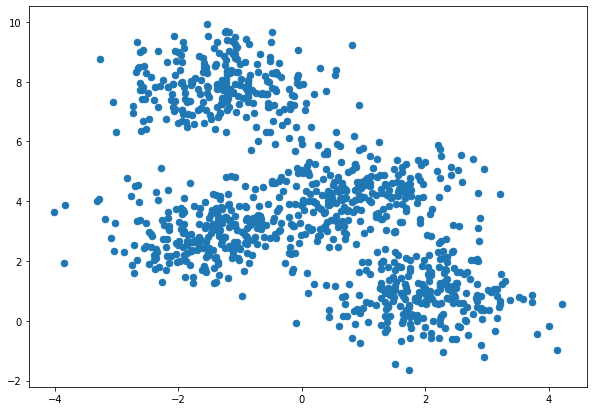

In [2]:
### The make_blobs [https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html]
### tool in sci-kit learn generates independent samples of Guassian random variables with different means.
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
X, y_true = make_blobs(n_samples = 1000, centers =4,cluster_std = .83 , n_features = 2, random_state=0)
plt.figure(figsize = (10,7))
plt.scatter(X[:,0],X[:,1], marker = '.', s= 170 )

This synthetic data is actually made up of 4 different clusters, and would be more accurately plotted as:

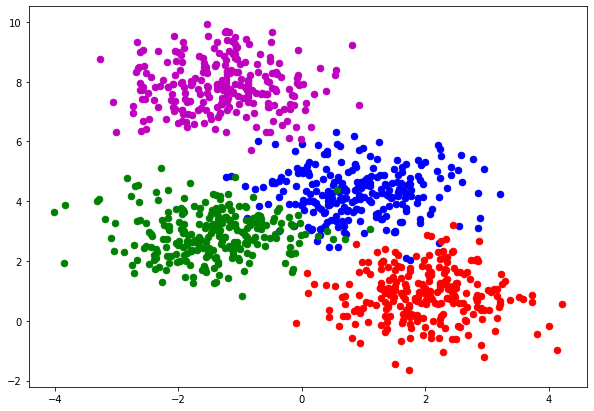

In [67]:
colors = ["b", "r", "g", "m"]
plt.figure(figsize = (10,7))
for k, col in enumerate(colors):
    cluster_data = y_true == k
    plt.scatter(X[cluster_data, 0], X[cluster_data, 1], c=col, marker=".", s = 170)

Unfortunately, we aren't always given this color coding above. Instead, we need to create it on our own. 

Let's start to formalize the problem:

**Definition:** A partition of $[n]=\{1,2,\dotsm,n\}$ of size $k$ is a collection of non-empty subsets $C_1,C_2,\dotsm, C_k\subset[n]$ such that
* (disjoint) $C_i\cap C_j = \emptyset$ for all $i\neq j$
* (cover) $\bigcup_{j=1}^k C_j = [n]$.

For example in the data plotted below, we would probably define the clusters as
$$
C_1 = \{1,8\}, C_2 = \{4,5 \} , C_3 = \{6, 7\}, C_4 = \{2, 3, 9\}.
$$ 

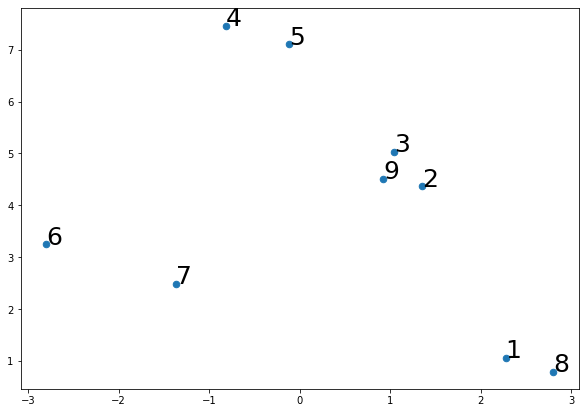

In [76]:
X, y_true = make_blobs(n_samples = 9, centers =4,cluster_std = .5 , n_features = 2, random_state=0)
plt.figure(figsize = (10,7))
plt.scatter(X[:,0],X[:,1], marker = '.', s= 170 )
for j in range(len(X[:,0])):
    plt.annotate(str(j+1), (X[j,0],X[j,1]), fontsize=25)

## Question: How do we find the clusters?

Typical method is the so-called $k$-means objective and minimize the "cost" of a partition $C_1,\dotsm C_k$ by:
$$
\displaystyle\mathcal{G}(C_1,\dotsm, C_k) = \min_{\boldsymbol\mu_1,\boldsymbol\mu_2,\dotsm, \boldsymbol{\mu}_k\in \mathbb{R}^d} \sum_{i=1}^k \sum_{j\in C_i} \|\mathbf{x}_j - \boldsymbol{\mu}_i\|^2.
$$ The minimum is taken over all possible choices of $\boldsymbol\mu_i$, and our goal is to minimize $\mathcal{G}(C_1,\dotsm, C_k)$; that is we want to solve
$$
\min_{C_1,\dotsm, C_k} \mathcal{G}(C_1,\dotsm, C_k).
$$

To unpack this, let's review some facts about vectors and minimization (which can be found in [Chapter 1, Lecture 2, Review ++](https://people.math.wisc.edu/~roch/mmids/roch-mmids-intro-2review.pdf)).

First, a **vector** $\mathbf{x}\in \mathbb{R}^d$ is a collection of $d$ real numbers which we will often write as *column vectors*
$$
\mathbf{x} = \begin{bmatrix}
x_1\\
x_2\\
\vdots\\ x_d
\end{bmatrix}\in \mathbb{R}^d.
$$

For any vector $\mathbf{x}$, we write 
$$
\|\mathbf{x}\|= \|\mathbf{x}\|_2 = \sqrt{\sum_{i=1}^d x_i^2}.
$$
We call this the **$\ell^2$-norm** of the vector $\mathbf{x}$.

We call this the $\ell^2$-norm because of the exponent $2$ in $x_i^2$ (the square-root $\sqrt{y} = y^{1/2}$ also involves a $2$ as well). 

There are other *norms* that we can define as well. (Definition will be included later.) 

The most common are the family of norms $\|\mathbf{x}\|_p$ for $p\in[1,\infty]$, called the **$\ell^p$-norms**, defined by
$$
\|\mathbf{x}\|_p = \left( \sum_{i=1}^d x_i^p\right)^{1/p} \qquad p\in[1,\infty)$$
$$
\|\mathbf{x}\|_\infty = \max_{i=1,2,\dotsm, d} |x_i|.
$$

The $\ell^2$-norm is important in part because of the connection to the dot-product: If $\mathbf{u}, \mathbf{v}\in \mathbb{R}^d$ are two vectors, then the **dot-product** of $\mathbf{u}$ and $\mathbf{v}$ is 
$$
\langle \mathbf{u},\mathbf{v}\rangle = \sum_{i=1}^d u_i v_i.
$$ Then
$$
\|\mathbf{x}\|_2 = \sqrt{\langle \mathbf{x},\mathbf{x}\rangle}.
$$

The $\ell^2$-norm is also how we measure the **Euclidean distance** between two vectors:
$$
d(\mathbf{u},\mathbf{v}) = \|\mathbf{u}-\mathbf{v}\| = \sqrt{\sum_{i=1}^d (u_i-v_i)^2}.
$$

Back to **$k$-means clustering**:
Goal is to 
$$
\Large\min_{C_1,\dotsm, C_k} \, \min_{\boldsymbol\mu_1,\dots, \boldsymbol\mu_k\in \mathbb{R}^d} \sum_{i=1}^k \sum_{j\in C_i} \|\mathbf{x}_j-\boldsymbol\mu_i\|^2.
$$

We know what we mean by $$\|\mathbf{x}_j -\boldsymbol{\mu}_i\|^2 = \sum_{l=1}^d\left( (\mathbf{x}_j)_l - (\boldsymbol{\mu}_i)_l\right)^2,$$
so how do we approach finding the minimum of a function? (Also from the Review ++ part of the notes).

**Minimizing a function** $f$

We write $$f:\mathcal{X} \to \mathcal{Y}$$
to mean that 
$$
f\text{ takes inputs }x\in \mathcal{X}\text{ and gives outputs }y =f(x)\in \mathcal{Y}.
$$

Typically we will consider $\mathcal{X}$ to be a collection of points in $\mathbb{R}^d$ and the set $\mathcal{Y} = \mathbb{R}$.

What are some "nice" sets $\mathcal{X}$?

The *open ball of radius* $r>0$ centered at $\mathbf{x}\in \mathbb{R}^d$ is the set
$$
B_r(\mathbf{x}) = \left\{\mathbf{y}\in \mathbb{R}^d: d(\mathbf{x},\mathbf{y}) = \|\mathbf{x}-\mathbf{y}\|< r\right\}.
$$

We say that $\mathbf{x}\in A$ is an *interior point* if there is some small $r>0$ such that 
$$
B_r(\mathbf{x}) \subset A.
$$

We say that a set $A\subset\mathbb{R}^d$ is *open* if every point $\mathbf{x}\in A$ is an interior point.

We say that a point $\mathbf{x}\in \mathbb{R}^d$ is an *accumulation point* of a set $A\subset\mathbb{R}^d$ if for each $r>0$ there exists a $y\in B_r(\mathbf{x})$ such that $y\in A$.

We say that a set $A\subset\mathbb{R}^d$ is *closed* if it contains all its accumulation points.

Here is a picture. On the left is an interior point and on the bottom-right is an accumulation point.
![Source](https://wiki.math.ntnu.no/_media/linearmethods/basicspaces/innerpoints_boundarypoints.jpg)

If every point on the border (or *boundary*) is contained in the set, then it is closed.

If none of those points are in the setm, it is open.

The set above is also *bounded* meaning that there is some $M$ such that
$$
A\subset B_M(0),\qquad \text{i.e.  for all }\mathbf{x}\in A \text{ it holds that }\|x\|< M.
$$

**Definition:**

Let $f:D\to \mathbb{R}$. We say that a $f$ has **limit** $L$ as $\mathbf{x}$ approaches $\mathbf{a}\in D$ if for every $\varepsilon>0$ there exists a $\delta>0$ such that $$|f(\mathbf{x})-L|< \varepsilon\text{ for all }\mathbf{x}\in (B_\delta(\mathbf{a})\cap D)\setminus \{\mathbf{a}\}.$$
We write this as
$$
\lim_{\mathbf{x}\to \mathbf{a}} f(\mathbf{x}) = L.
$$

We say that a function $f:D\to \mathbb{R}$ is **continuous** if for all $\mathbf{a}\in D$
$$
\lim_{\mathbf{x}\to \mathbf{a} } f(\mathbf{x}) = f(\mathbf{a}).
$$